In [1]:
from IPython.display import clear_output

In [3]:
import torch
import torch.nn as nn
from torch.optim import SGD

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Contents:

1. Implementation of Logistic Regression using Pytorch to make a classifier for Breat Cancer Dataset

You need to know:

1. **pytorch** (for impelementation)
2. a little bit of **matplotlib** (for visualization)

## Loading Data

In [5]:
data = load_breast_cancer()

In [6]:
print(data.DESCR)  # description of dataset, try to understand and it will gice you olso the faetures

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
print('feature_names:', data.feature_names)
print('-'*20)
print('target_names:', data.target_names)

feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
--------------------
target_names: ['malignant' 'benign']


In [10]:
# Load the Breast Cancer dataset

X = data.data#all data
y = data.target# the target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# if we gonna use this data it has to be tensor because we are using Tensor library
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# if we have a big data it's profachinally to use scalar

In [12]:
print(f'{X.shape=}')
print(f'{y.shape=}')
print('-'*10)
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print('-'*10)
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')
#focus on shaping

X.shape=(569, 30)
y.shape=(569,)
----------
X_train.shape=torch.Size([455, 30])
X_test.shape=torch.Size([114, 30])
----------
y_train.shape=torch.Size([455])
y_test.shape=torch.Size([114])


In [15]:
# Torch module based model for logistic_regression
#####in multiclass don't use sigmoind use softmax
class LogisticRegression(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression, self).__init__()
    self.linear_weights = nn.Linear(input_dim, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    y = self.linear_weights(x)
    z = self.sigmoid(y)  # a sigmoid over a linear layer output
    return z

In [44]:
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss (binary because 2 classes). Cross entropy function in torch is multi-class
optimizer = SGD(model.parameters(), lr=0.01)

num_epochs = 1000
lr = 1e-2

## Training the model

In [45]:
train_losses = []

for epoch in range(num_epochs):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train.unsqueeze(dim=-1))

  # Backward pass and optimization #alyays
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2351
Epoch [200/1000], Loss: 0.1781
Epoch [300/1000], Loss: 0.1524
Epoch [400/1000], Loss: 0.1370
Epoch [500/1000], Loss: 0.1263
Epoch [600/1000], Loss: 0.1185
Epoch [700/1000], Loss: 0.1124
Epoch [800/1000], Loss: 0.1075
Epoch [900/1000], Loss: 0.1034
Epoch [1000/1000], Loss: 0.0999


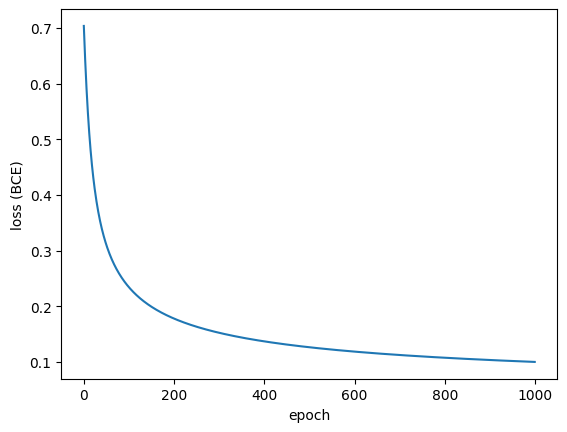

In [46]:
plt.plot(train_losses)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()

In [47]:
model.eval()
with torch.no_grad():

  y_pred = model(X_test)# there is a max here somehow in   multiclass
  y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

  correct = (y_pred == y_test.view(-1, 1)).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 96.49%
